In [149]:
import pandas as pd
import numpy as np

Lecture des fichiers CSV

In [150]:
df_anim = pd.read_csv('csv/FAOSTAT_anim.csv')
df_veg = pd.read_csv('csv/FAOSTAT_veg.csv')
df_pop = pd.read_csv('csv/FAOSTAT_pop.csv')

Création d'une fonction pour nettoyer les titres des colonnes

In [151]:
def clean_columns(dataframe):
    for column in dataframe:
        dataframe.rename(columns = {column : column.lower().strip().replace(" ", "_")},
        inplace = True)
    return dataframe

Nettoyage des titres des colonnes

In [152]:
clean_columns(df_anim)
clean_columns(df_veg)
clean_columns(df_pop)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,37172.00,X,Figure from international organizations
1,FBS,Food Balances (2010-),4,Afghanistan,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,38041.75,X,Figure from international organizations
2,FBS,Food Balances (2010-),8,Albania,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,2883.00,X,Figure from international organizations
3,FBS,Food Balances (2010-),8,Albania,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,2880.92,X,Figure from international organizations
4,FBS,Food Balances (2010-),12,Algeria,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,42228.00,X,Figure from international organizations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,FBS,Food Balances (2010-),887,Yemen,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,29161.92,X,Figure from international organizations
354,FBS,Food Balances (2010-),894,Zambia,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,17352.00,X,Figure from international organizations
355,FBS,Food Balances (2010-),894,Zambia,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,17861.03,X,Figure from international organizations
356,FBS,Food Balances (2010-),716,Zimbabwe,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,14438.80,X,Figure from international organizations


Création de la colonne type

In [153]:
df_anim.insert(0, 'type', 'animal')
df_veg.insert(0, 'type', 'vegetal')

Concaténation des DataFrames pour les animaux et les végétaux

In [154]:
products = pd.concat([df_anim, df_veg])
products.head()

,type,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
0,animal,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2018,2018,kg,2.62,E,Estimated value
1,animal,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2019,2019,kg,2.73,E,Estimated value
2,animal,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2018,2018,kcal/capita/day,15.42,E,Estimated value
3,animal,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2019,2019,kcal/capita/day,16.03,E,Estimated value
4,animal,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2731,Bovine Meat,2018,2018,g/capita/day,1.09,E,Estimated value


Réduction de la DataFrame population aux colonnes area code, area, year, value + changement du nom de la colonne value

In [155]:
df_pop = df_pop.loc[:, ['area_code_(m49)', 'area', 'year', 'value']]
df_pop.rename(columns={'value': 'pop_1000_hab'}, inplace=True)

df_pop.head()

,area_code_(m49),area,year,pop_1000_hab
0,4,Afghanistan,2018,37172.00
1,4,Afghanistan,2019,38041.75
2,8,Albania,2018,2883.00
3,8,Albania,2019,2880.92
4,12,Algeria,2018,42228.00


Fusion des DataFrames produits et population

In [156]:
products = products.loc[:, ['area_code_(m49)', 'area', 'element', 'item', 'year', 'type', 'unit', 'value']]
df = pd.merge(products, df_pop, on=['area_code_(m49)', 'area', 'year'])

Type de chaque colonne

In [157]:
print(df.dtypes)

area_code_(m49)      int64
area                object
element             object
item                object
year                 int64
type                object
unit                object
value              float64
pop_1000_hab       float64
dtype: object


Valeurs manquantes

In [158]:
print(df.isnull().count())

area_code_(m49)    122189
area               122189
element            122189
item               122189
year               122189
type               122189
unit               122189
value              122189
pop_1000_hab       122189
dtype: int64


Vérification des valeurs (aberrantes ou non)

In [159]:
df.describe()

,area_code_(m49),year,value,pop_1000_hab
count,122189.000000,122189.000000,122189.000000,1.221890e+05
mean,428.730401,2018.508802,10.976657,4.409701e+04
std,251.853920,0.499925,56.342282,1.571651e+05
min,4.000000,2018.000000,-0.030000,1.076000e+01
25%,208.000000,2018.000000,0.000000,2.801000e+03
50%,422.000000,2019.000000,0.190000,9.965000e+03
75%,643.000000,2019.000000,2.760000,3.182529e+04
max,894.000000,2019.000000,1779.760000,1.465634e+06


Liste les différents pays de manière unique

In [160]:
df.area.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guat

Passage des colonnes area_code, area, year, pop_1000_hab, type, item en index

In [161]:
df = pd.pivot_table(df, index=['area_code_(m49)', 'area', 'year', 'pop_1000_hab', 'type', 'item'], columns='element', values='value')
df = df.reset_index()

Nettoyage nom de colonne

In [162]:
clean_columns(df)

element,area_code_(m49),area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,4,Afghanistan,2018,37172.00,animal,Bovine Meat,1.20,15.42,2.62,1.09
1,4,Afghanistan,2018,37172.00,animal,"Butter, Ghee",2.50,22.14,1.00,0.03
2,4,Afghanistan,2018,37172.00,animal,Cream,0.02,0.23,0.04,0.00
3,4,Afghanistan,2018,37172.00,animal,Demersal Fish,0.00,0.13,0.15,0.03
4,4,Afghanistan,2018,37172.00,animal,Eggs,0.44,6.06,1.55,0.45
...,...,...,...,...,...,...,...,...,...,...
30719,894,Zambia,2019,17861.03,vegetal,Tea (including mate),0.00,0.12,0.11,0.03
30720,894,Zambia,2019,17861.03,vegetal,Tomatoes and products,0.01,0.78,1.40,0.04
30721,894,Zambia,2019,17861.03,vegetal,"Vegetables, other",0.10,12.54,17.94,0.72
30722,894,Zambia,2019,17861.03,vegetal,Wheat and products,0.26,62.61,7.58,1.86


Masque pour l'année 2018

In [163]:
df_2018 = df.loc[df.year == 2018]

Importation des csv des zones géographiques

In [164]:
# list_zone = ['eastern_africa', 'middle_africa', 'northern_africa', 'southern_africa', 'western_africa', 'northern_america', 'central_america', 'caribbean', 'south_america', 'central_asia', 'eastern_asia', 'southern_asia', 'south_eastern_asia', 'western_asia', 'eastern_europe', 'northern_europe', 'southern_europe', 'western_europe', 'australia_new_zealand', 'melanesia', 'micronesia', 'polynesia']

#test avec list comprehension
# df['zone'] = [ pd.read_csv("csv/" + zone + ".csv" ) for zone in list_zone if ]

#test avec fonction
# def import_csv(arg = list_zone[0]):
#     df_name = pd.read_csv(arg + ".csv")
#     clean_columns(df_name)
#     df_name['zone'] = arg
#     return df_name['zone']

# import_csv('eastern_africa')

Médiane de la variable fat_supply , Q1, Q3, moyenne, écrat type :

In [165]:
df_2018["fat_supply_quantity_(g/capita/day)"].describe()

count    14984.000000
mean         1.049028
std          3.390917
min          0.000000
25%          0.000000
50%          0.030000
75%          0.350000
max         61.240000
Name: fat_supply_quantity_(g/capita/day), dtype: float64

- Médiane : 0.03
- Q1 : 0
- Q3 : 0.35
- Moyenne : 1.058911
- Ecart type : 3.434564

En moyenne l'apport en matière grasse des aliments est de 1.06, 75% des aliments sont cependant plus faible en apport de graisse que la moyenne.

Histogramme

C:\Users\Shadume\AppData\Local\Temp\ipykernel_17328\3112176208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['pop_1000_hab'] = np.log(df['pop_1000_hab'])


TypeError: hist() missing 1 required positional argument: 'x'

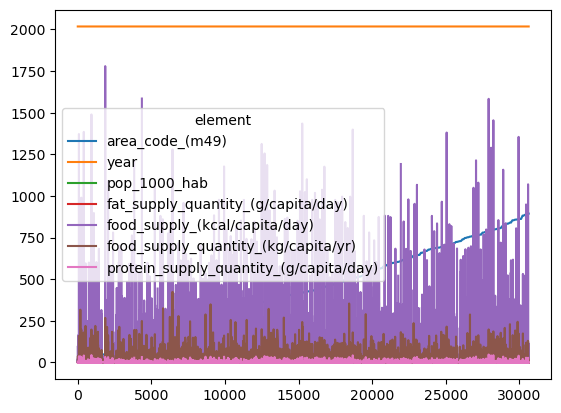

In [166]:
df_2018['pop_1000_hab'] = np.log(df['pop_1000_hab'])
df_2018.plot().hist()

Population de l'Ukraine en 2018

In [ ]:
ukraine_index = df_2018.index[df_2018.area == 'Ukraine'].tolist()
ukraine_pop = df_2018.loc[ukraine_index[0], 'pop_1000_hab']
ukraine_pop

44246.0

Soit 44.24 millions l'habitants en Ukraine pour l'année 2018

Les 10 pays les plus peuplés

In [ ]:
df[['area', 'pop_1000_hab']].drop_duplicates().nlargest(10, 'pop_1000_hab')

element,area,pop_1000_hab
6054,China,14.193521
5703,"China, mainland",14.171539
12779,India,14.117570
30050,United States of America,12.698009
12953,Indonesia,12.497514
21705,Pakistan,12.265416
3088,Brazil,12.252331
21282,Nigeria,12.185232
1795,Bangladesh,11.991499
23667,Russian Federation,11.889538


Population mondiale en 2018 / 2019

In [ ]:
#Revenir dessus plus tard
#df_2018.loc[:, 'pop_1000_hab'].unique().sum()

1575.152265095615

Pays dont on dispose du moins d'informations

In [ ]:
df.isnull().drop_duplicates().sum(axis=1).nlargest(5)
df.loc[[17, 5012, 9042, 72, 12765], 'area']

17                      Afghanistan
5012       Central African Republic
9042                        Finland
72                      Afghanistan
12765    Iran (Islamic Republic of)
Name: area, dtype: object

Les 5 pays avec le taux de croissance démographique le plus élevé entre 2018 et 2019

In [168]:
# df_taux_croissance = df.set_index(['year']).unstack(level=0)
# df['taux_croissance_pop_18_19'] = df.pct_change(axis='columns').mul(100).fillna(0)



# value = df['year']['pop_1000_hab']
# df['taux_croissance_pop_18_19'] = df['pop_1000_hab'].sub(value).div(value).mul(100).fillna(0)
# df['taux_croissance_pop_18_19']

TypeError: unsupported operand type(s) for /: 'str' and 'int'